In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

In [85]:
from matplotlib import cm

#a=cm.RdPu,
#a=cm.jet
#a= cm.coolwarm
from mpl_toolkits.mplot3d import Axes3D

In [86]:
x = np.arange(0., 1., .01)              # points in the x axis
y = np.arange(0., 1., .01)              # points in the y axis
x, y = np.meshgrid(x, y)                # create the "base grid"

In [146]:
z = x*y

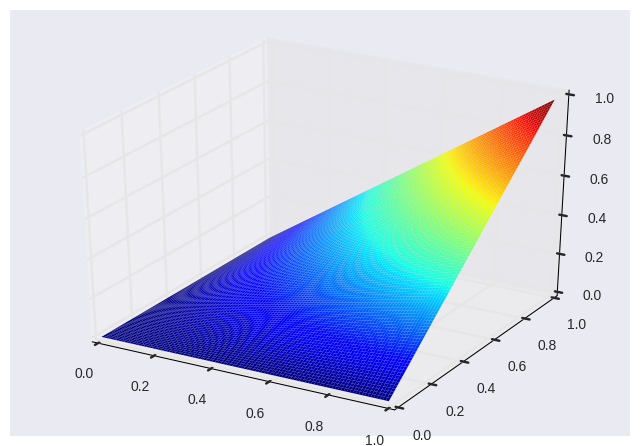

In [147]:
#independent copula (product copula)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
a=cm.jet
ax.plot_surface(x, y, z, cmap=a,rstride=1, cstride=1, linewidth=0,antialiased=True)

In [148]:
# the Frank copula

a = 3.4
b = np.exp(-a)
z = -np.log(1. + (b*np.exp(x) - 1.)*(b*np.exp(y) - 1.)/(b - 1.))/a

a = -3.4
b = np.exp(-a)
z1 = -np.log(1. + (b*np.exp(x) - 1.)*(b*np.exp(y) - 1.)/(b - 1.))/a

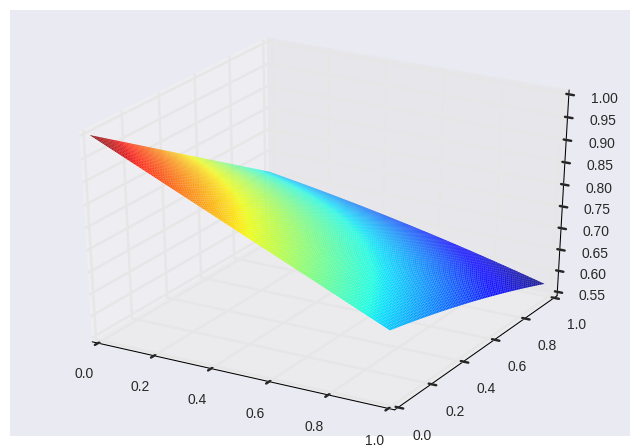

In [149]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
a=cm.jet
ax.plot_surface(x, y, z,  cmap=a,rstride=1, cstride=1, linewidth=0,antialiased=True)

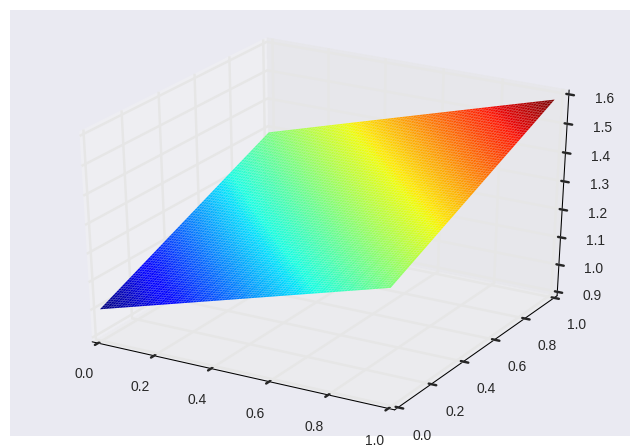

In [150]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
a=cm.jet
ax.plot_surface(x, y, z1, cmap=a, rstride=1, cstride=1, linewidth=0,antialiased=True)

In [100]:
# the gumbel copula - upper tail

a = 0.4357704244319398
b = 1./a
z = np.exp(-((-np.log(x))**a + (-np.log(y))**a)**b)

a = -0.4357704244319398
b = 1./a
z1 = np.exp(-((-np.log(x))**a + (-np.log(y))**a)**b)

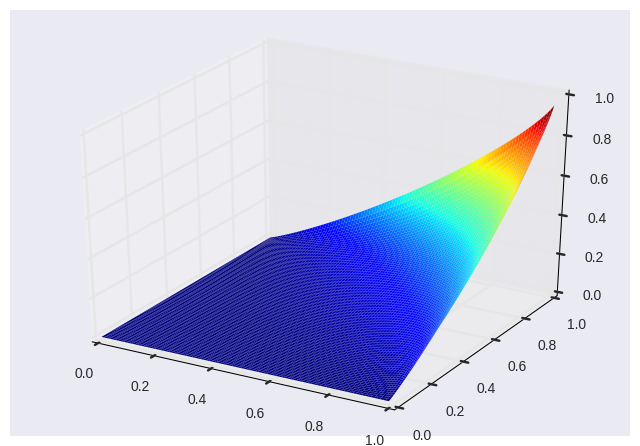

In [101]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
a=cm.jet
ax.plot_surface(x, y, z, cmap=a, rstride=1, cstride=1, linewidth=0,antialiased=True)

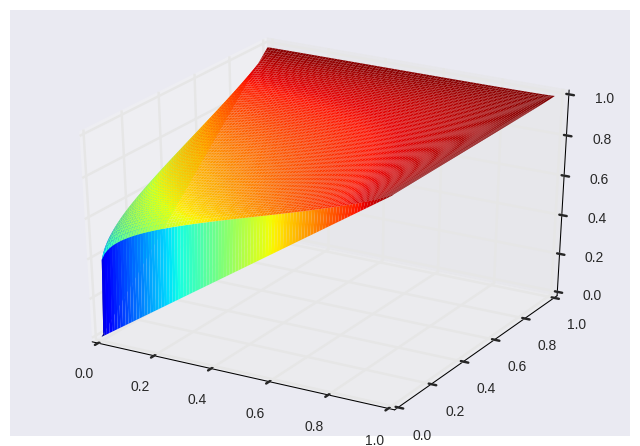

In [102]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
a=cm.jet
ax.plot_surface(x, y, z1, cmap=a, rstride=1, cstride=1, linewidth=0,antialiased=True)

In [103]:
# the clayton copula - upper tail

a = 1.87936768303043
b = - 1./a
z = np.maximum(((x**-a) + (y**-a) - 1.)**b, 0.)

a = -1.87936768303043
b = - 1./a
z1 = np.maximum(((x**-a) + (y**-a) - 1.)**b, 0.)

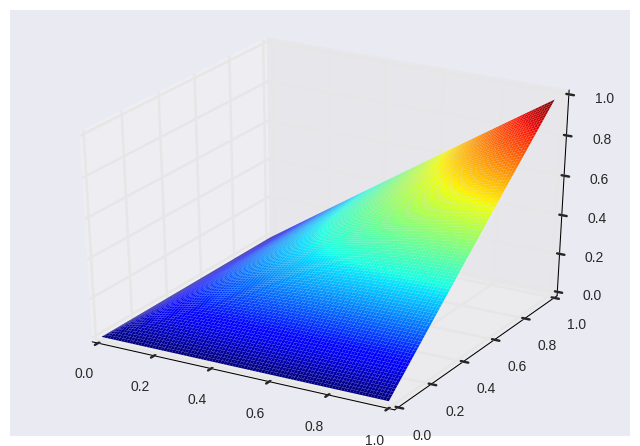

In [104]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
a=cm.jet
ax.plot_surface(x, y, z, cmap=plt.cm.jet, rstride=1, cstride=1, linewidth=0,antialiased=True)

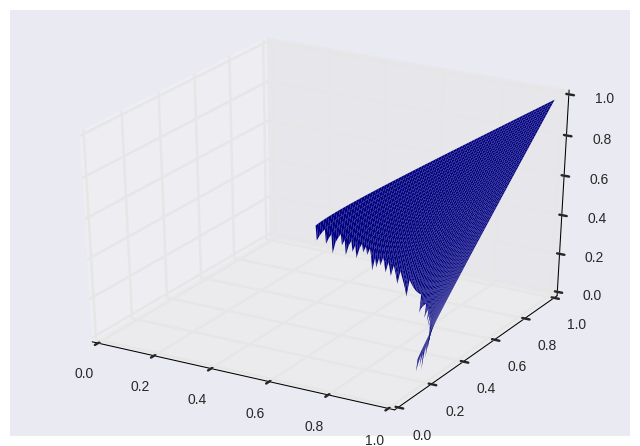

In [105]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
a=cm.jet
ax.plot_surface(x, y, z1, cmap=plt.cm.jet, rstride=1, cstride=1, linewidth=0,antialiased=True)

In [158]:
# the Plackett copula
a = .4

b = 1. + (a -1.) * (x + y)

z =(np.sqrt(b - b * b - 4. * x * y * a * (a - 1.)))/(2. * (a - 1.))

a = -.01

b = 1. + (a -1.) * (x + y)

z1 =(np.sqrt(b - b * b - 4. * x * y * a * (a - 1.)))/(2. * (a - 1.))


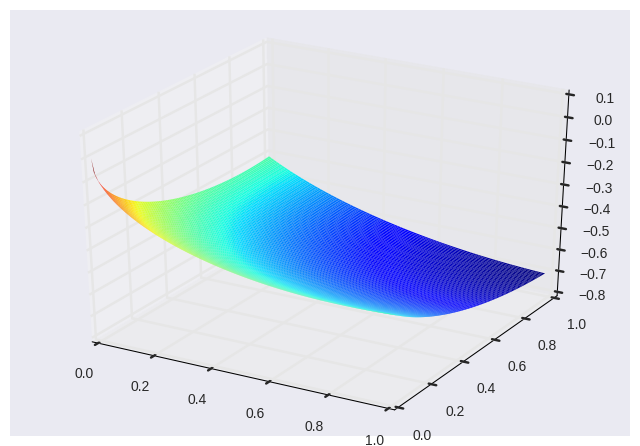

In [159]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
a=cm.jet
ax.plot_surface(x, y, z, cmap=a, rstride=1, cstride=1, linewidth=0,antialiased=True)

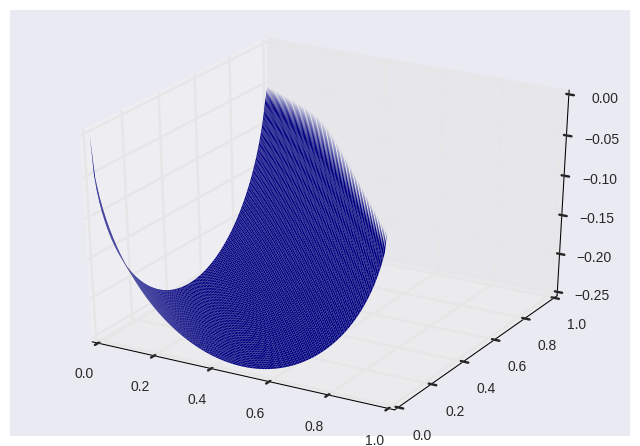

In [162]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z1, cmap=a, rstride=1, cstride=1, linewidth=0,antialiased=True)

In [163]:
def pdf_multivariate_gauss(x, mu, cov):
    '''
    Caculate the multivariate normal density (pdf)

    Keyword arguments:
        x = numpy array of a "d x 1" sample vector
        mu = numpy array of a "d x 1" mean vector
        cov = "numpy array of a d x d" covariance matrix
    '''
    assert(mu.shape[0] > mu.shape[1]), 'mu must be a row vector'
    assert(x.shape[0] > x.shape[1]), 'x must be a row vector'
    assert(cov.shape[0] == cov.shape[1]), 'covariance matrix must be square'
    assert(mu.shape[0] == cov.shape[0]), 'cov_mat and mu_vec must have the same dimensions'
    assert(mu.shape[0] == x.shape[0]), 'mu and x must have the same dimensions'
    part1 = 1 / ( ((2* np.pi)**(len(mu)/2)) * (np.linalg.det(cov)**(1/2)) )
    part2 = (-1/2) * ((x-mu).T.dot(np.linalg.inv(cov))).dot((x-mu))
    return float(part1 * np.exp(part2))

In [118]:
pdf_multivariate_gauss(np.array([.1,.1]).reshape(-1, 1), np.array([0.,0.]).reshape(-1, 1),np.array([[1,.7],[.7,1]]))

0.1572935031134749

In [164]:
z = []

for i in xrange(100):
    tmp = []
    for j in xrange(100):
        tmp.append(pdf_multivariate_gauss(np.array([x[i][j],y[i][j]]).reshape(-1, 1), np.array([0.,0.]).reshape(-1, 1),np.array([[1,.7],[.7,1]])) )
    z.append(tmp)
    
z1 = []

for i in xrange(100):
    tmp = []
    for j in xrange(100):
        tmp.append(pdf_multivariate_gauss(np.array([x[i][j],y[i][j]]).reshape(-1, 1), np.array([0.,0.]).reshape(-1, 1),np.array([[1,-.7],[-.7,1]])) )
    z1.append(tmp)    
    

In [106]:
# the Gaussian copula

from scipy.stats import multivariate_normal
var = multivariate_normal(mean=[0,0], cov=[[1,0.7],[0.7,1]])


z = []

for i in xrange(100):
    tmp = []
    for j in xrange(100):
        tmp.append(var.pdf([x[i,j],y[i,j]]) )
    z.append(tmp)

In [103]:
import matplotlib.mlab as mlab
z = mlab.bivariate_normal(x, y, 1.0, 1.0, 0.7,0.7)
z1 = mlab.bivariate_normal(x, y, 1.0, 1.0, -0.7,-0.7)

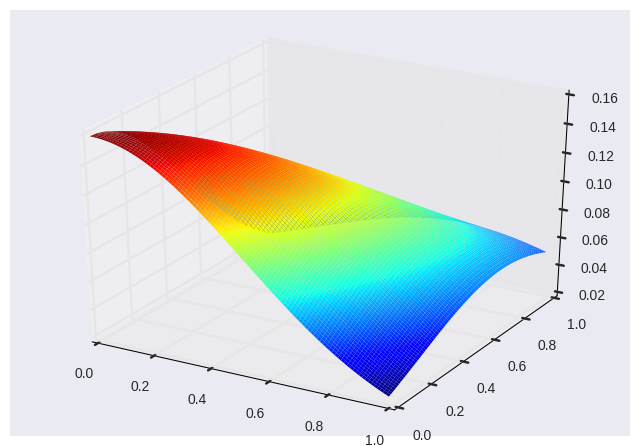

In [165]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
a=cm.jet
ax.plot_surface(x, y, z, cmap=a, rstride=1, cstride=1, linewidth=0,antialiased=True)

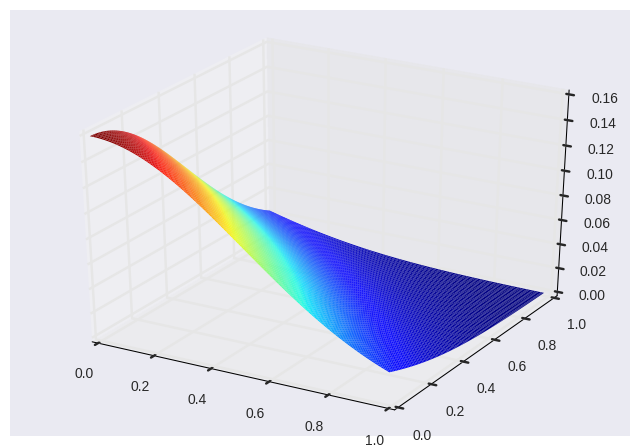

In [166]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
a=cm.jet
ax.plot_surface(x, y, z1, cmap=a, rstride=1, cstride=1, linewidth=0,antialiased=True)

In [170]:
# the Student t copula

import numpy as np
from math import *

def multivariate_t_distribution(x,mu,Sigma,df,d):
    '''
    Multivariate t-student density:
    output:
        the density of the given element
    input:
        x = parameter (d dimensional numpy array or scalar)
        mu = mean (d dimensional numpy array or scalar)
        Sigma = scale matrix (dxd numpy array)
        df = degrees of freedom
        d: dimension
    '''
    Num = gamma(1. * (d+df)/2)
    Denom = ( gamma(1.*df/2) * pow(df*pi,1.*d/2) * pow(np.linalg.det(Sigma),1./2) * pow(1 + (1./df)*np.dot(np.dot((x - mu),np.linalg.inv(Sigma)), (x - mu)),1.* (d+df)/2))
    d = 1. * Num / Denom 
    return d

In [171]:
z = []

for i in xrange(100):
    tmp = []
    for j in xrange(100):
        tmp.append(multivariate_t_distribution(np.array([x[i][j],y[i][j]]), np.array([0.,0.]),np.array([[1,.7],[.7,1]]),1,2))
    z.append(tmp)

In [172]:
z1 = []

for i in xrange(100):
    tmp = []
    for j in xrange(100):
        tmp.append(multivariate_t_distribution(np.array([x[i][j],y[i][j]]), np.array([0.,0.]),np.array([[1,-.7],[-.7,1]]),1,2))
    z1.append(tmp)

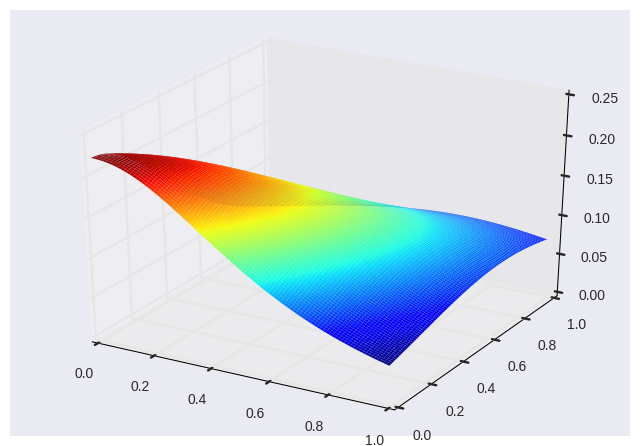

In [173]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
a=cm.jet
ax.plot_surface(x, y, z, cmap=a, rstride=1, cstride=1, linewidth=0,antialiased=True)

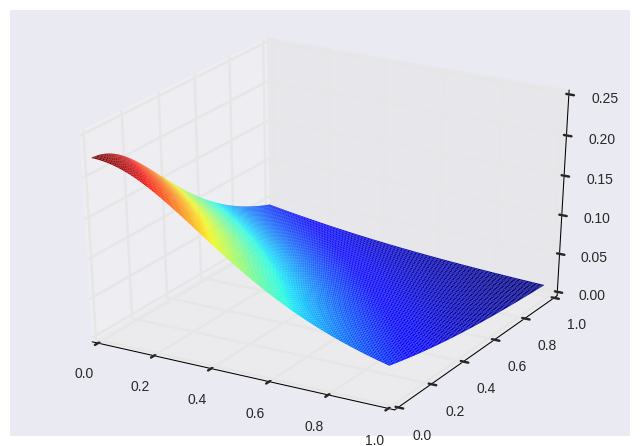

In [174]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
a=cm.jet
ax.plot_surface(x, y, z1, cmap=a, rstride=1, cstride=1, linewidth=0,antialiased=True)

In [2]:
prices = pd.read_csv('../data/FXData.csv')

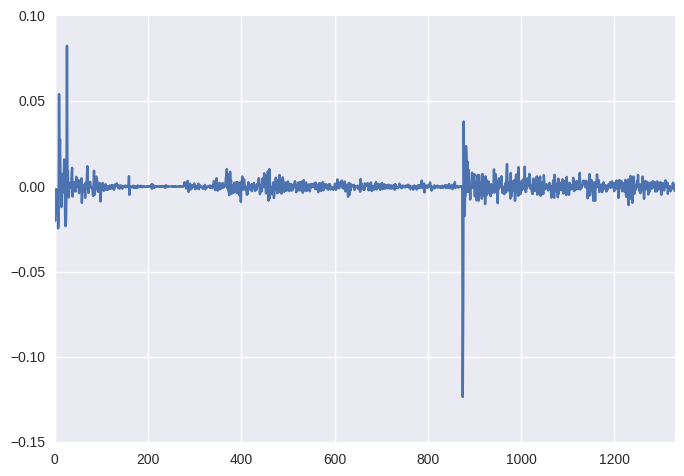

In [3]:
prices['CHFEUR_rtn'] = prices['CHFEUR'].pct_change().plot()

In [17]:
prices['CHFEUR_log_ret'] = np.log(prices['CHFEUR']) - np.log(prices['CHFEUR'].shift(1))

In [18]:
prices['DKKEUR_log_ret'] = np.log(prices['DKKEUR']) - np.log(prices['DKKEUR'].shift(1))

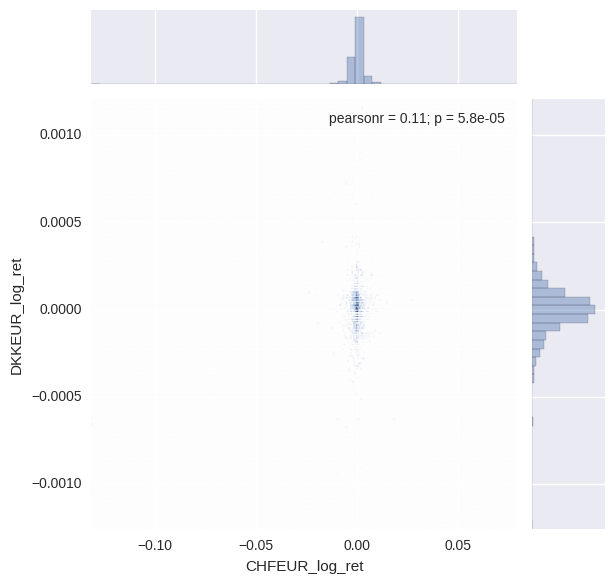

In [20]:
sns.jointplot(x="CHFEUR_log_ret", y="DKKEUR_log_ret",kind="hex", data=prices);

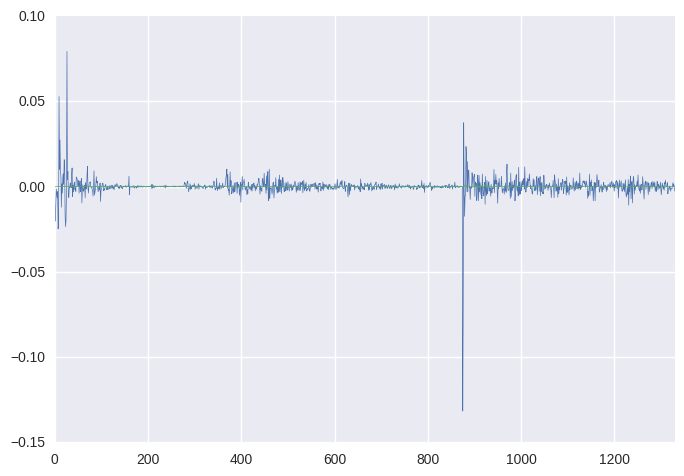

In [28]:
prices['CHFEUR_log_ret'].plot(linewidth=.5)
prices['DKKEUR_log_ret'].plot(linewidth=.5)

In [31]:
prices["CHFDKK_correl"] = pd.rolling_corr(prices["CHFEUR_log_ret"],prices["DKKEUR_log_ret"], 63)

In [22]:
prices['CZKEUR_log_ret'] = np.log(prices['CZKEUR']) - np.log(prices['CZKEUR'].shift(1))
prices['PLNEUR_log_ret'] = np.log(prices['PLNEUR']) - np.log(prices['PLNEUR'].shift(1))

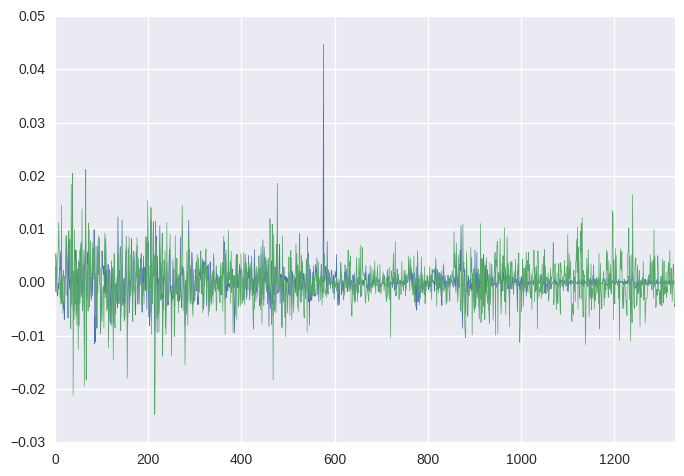

In [29]:
prices['CZKEUR_log_ret'].plot(linewidth=.5)
prices['PLNEUR_log_ret'].plot(linewidth=.5)

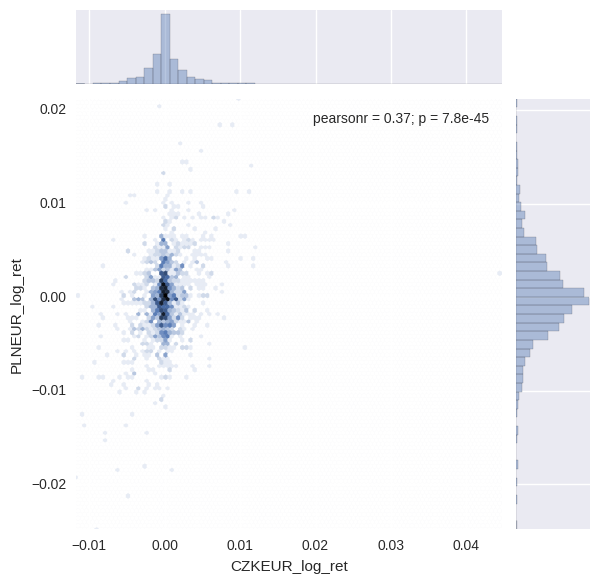

In [23]:
sns.jointplot(x="CZKEUR_log_ret", y="PLNEUR_log_ret", kind="hex", data=prices);

In [32]:
prices["CZKPLN_correl"] = pd.rolling_corr(prices["CZKEUR_log_ret"],prices["PLNEUR_log_ret"], 63)

In [26]:
prices['ZARUSD_log_ret'] = np.log(prices['ZARUSD']) - np.log(prices['ZARUSD'].shift(1))
prices['BRLUSD_log_ret'] = np.log(prices['BRLUSD']) - np.log(prices['BRLUSD'].shift(1))
prices["ZARBRL_correl"] = pd.rolling_corr(prices["ZARUSD_log_ret"],prices["BRLUSD_log_ret"], 63)

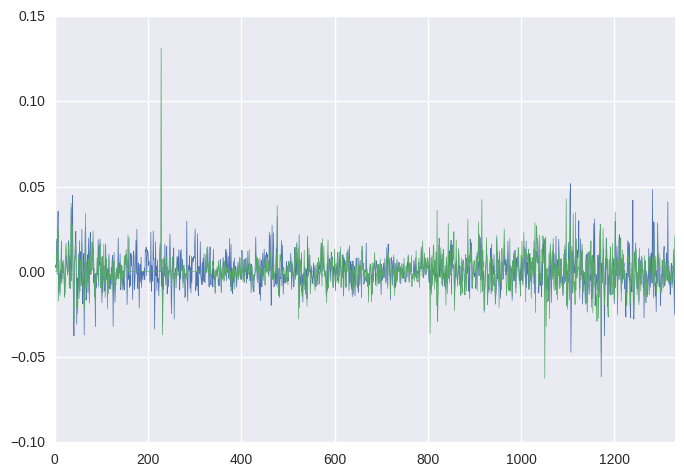

In [95]:
prices['ZARUSD_log_ret'].plot(linewidth=.5)
prices['BRLUSD_log_ret'].plot(linewidth=.5)

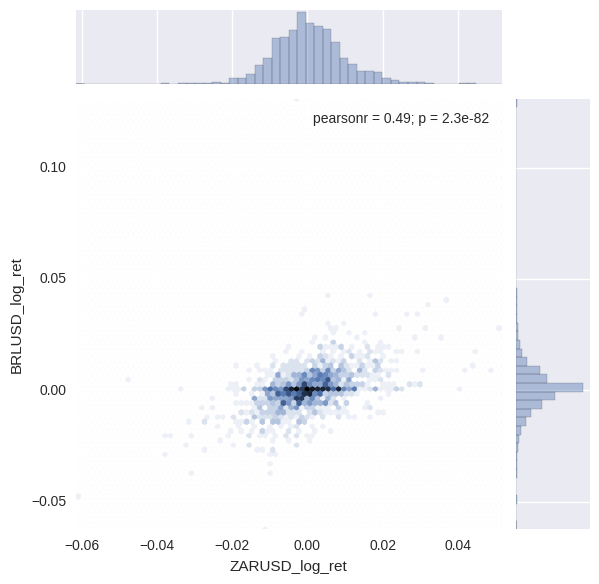

In [27]:
sns.jointplot(x="ZARUSD_log_ret", y="BRLUSD_log_ret",kind="hex", data=prices);

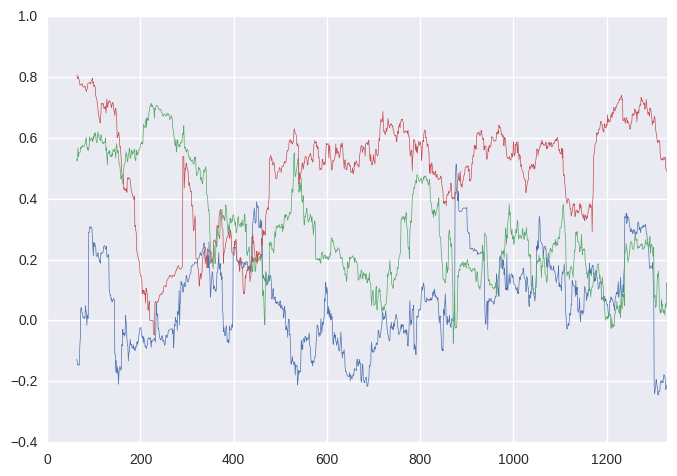

In [33]:
prices["CHFDKK_correl"].plot(linewidth=.5)
prices["CZKPLN_correl"].plot(linewidth=.5)
prices["ZARBRL_correl"].plot(linewidth=.5)

In [71]:
stats.pearsonr(prices['CHFEUR_log_ret'].dropna(), prices['DKKEUR_log_ret'].dropna())

(0.11002914921213722, 5.792390735575531e-05)

In [72]:
np.corrcoef(prices['CHFEUR_log_ret'].dropna(), prices['DKKEUR_log_ret'].dropna())

array([[ 1.        ,  0.11002915],
       [ 0.11002915,  1.        ]])

In [73]:
stats.stats.kendalltau(prices['CHFEUR_log_ret'].dropna(), prices['DKKEUR_log_ret'].dropna())

KendalltauResult(correlation=0.038826108911294836, pvalue=0.033909823725966924)

In [74]:
stats.spearmanr(prices['CHFEUR_log_ret'].dropna(), prices['DKKEUR_log_ret'].dropna())

SpearmanrResult(correlation=0.057930882090346941, pvalue=0.0346454159782002)

In [75]:
stats.pearsonr(prices['CZKEUR_log_ret'].dropna(), prices['PLNEUR_log_ret'].dropna())

(0.37169385372264191, 7.8088076593260921e-45)

In [76]:
stats.stats.kendalltau(prices['CZKEUR_log_ret'].dropna(), prices['PLNEUR_log_ret'].dropna())

KendalltauResult(correlation=0.20265314901393905, pvalue=1.7284057232781086e-28)

In [77]:
stats.spearmanr(prices['CZKEUR_log_ret'].dropna(), prices['PLNEUR_log_ret'].dropna())

SpearmanrResult(correlation=0.29399360383522011, pvalue=6.3154458026250365e-28)

In [80]:
stats.pearsonr(prices['BRLUSD_log_ret'][2::], prices['ZARUSD_log_ret'][2::])

(0.49310368054633413, 2.338910804431261e-82)

In [81]:
stats.stats.kendalltau(prices['BRLUSD_log_ret'][2::], prices['ZARUSD_log_ret'][2::])

KendalltauResult(correlation=0.35454773337303785, pvalue=1.6056021875299168e-83)

In [82]:
stats.spearmanr(prices['BRLUSD_log_ret'][2::], prices['ZARUSD_log_ret'][2::])

SpearmanrResult(correlation=0.5018936192613318, pvalue=1.0283795650143845e-85)

In [83]:
# Clayton delta param
correlation=0.35454773337303785
- 2. * correlation/(correlation - 1.)

1.098602489153386

In [84]:
#Gumbel delta param
- 1./(correlation - 1.)

1.549301244576693

In [99]:
# Clayton lower tail dependence
2. ** (1./1.098602489153386)

1.87936768303043

In [98]:
# Gumbel upper tail dependence
2. - 2. ** (1./1.549301244576693)

0.4357704244319398